In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [44]:
job="backend-developer"
df=pd.read_csv("../separated_jobs/backend-developer.csv")

In [45]:
df.head()

,company_name,job_role,job_location,salary_pa,skills,company_rating,standardized_job_role
0,Antriksh Labs Private Limited,Backend Developer Intern,Remote,30000.0,"CI/CD, Computer science, Node.js, Relational d...",NaN,Backend-Developer
1,Threeway Studio,Backend Developer Trainee,Remote,0.0,"CSS, Git, JavaScript, HTML",NaN,Backend-Developer
2,Finpoint,Junior Python Backend Developer,Bengaluru,600000.0,"Data modeling, Operating systems, Software dep...",5.0,Backend-Developer
3,Notchup (formerly codemonk.ai),NodeJs Backend Developer,Remote,900000.0,"Node.js, OOP, AWS, PostgreSQL, REST",3.8,Backend-Developer
4,Zonopact India Pvt. Ltd.,Junior Backend Developer (Spring Microservices),Remote,270000.0,"CI/CD, Relational databases, Git, Java, Databases",NaN,Backend-Developer


In [46]:
df.isnull().sum()

company_name               0
job_role                   0
job_location               0
salary_pa                  0
skills                     5
company_rating           233
standardized_job_role      0
dtype: int64

In [47]:
df['salary_pa'] = df['salary_pa'].astype(float) / 100000
df.rename(columns = {'salary_pa':'salary_lpa'}, inplace = True)

### Filling the null values by replacing with average salary of company rating

In [49]:
df['company_rating'] = df['company_rating'].fillna(0)
df["salary_lpa"]=df.salary_lpa.fillna(0)
avg_salary_by_rating = df[df['salary_lpa'] > 0].groupby('company_rating')['salary_lpa'].mean()


In [50]:
def map_with_nearest_rating(row, avg_salary_by_rating):
    if row['salary_lpa'] == 0:  # Check if salary is 0
        rating = row['company_rating']
        if rating in avg_salary_by_rating:  # If exact match exists
            return avg_salary_by_rating[rating]
        else:  # Find the closest rating
            nearest_rating = min(avg_salary_by_rating.keys(), key=lambda x: abs(x - rating))
            return avg_salary_by_rating[nearest_rating]
    return row['salary_lpa']  # If salary isn't 0, return the original value

# Apply the function to the DataFrame
df['salary_lpa'] = df.apply(lambda row: map_with_nearest_rating(row, avg_salary_by_rating), axis=1)


In [51]:
df

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role
0,Antriksh Labs Private Limited,Backend Developer Intern,Remote,0.300000,"CI/CD, Computer science, Node.js, Relational d...",0.0,Backend-Developer
1,Threeway Studio,Backend Developer Trainee,Remote,7.347196,"CSS, Git, JavaScript, HTML",0.0,Backend-Developer
2,Finpoint,Junior Python Backend Developer,Bengaluru,6.000000,"Data modeling, Operating systems, Software dep...",5.0,Backend-Developer
3,Notchup (formerly codemonk.ai),NodeJs Backend Developer,Remote,9.000000,"Node.js, OOP, AWS, PostgreSQL, REST",3.8,Backend-Developer
4,Zonopact India Pvt. Ltd.,Junior Backend Developer (Spring Microservices),Remote,2.700000,"CI/CD, Relational databases, Git, Java, Databases",0.0,Backend-Developer
...,...,...,...,...,...,...,...
509,Jodo,"Software Engineer, Backend",Bengaluru,8.500000,"Go, Node.js, NoSQL, Git, MongoDB",3.2,Backend-Developer
510,AppSure Software Solutions,Software Developers Trainee (.Net),Kerala,12.666667,".NET, Software development, Communication skills",2.6,Backend-Developer
511,BigSpire Software,PHP Developers - Freshers,India,15.488235,"PHP, Communication skills, MySQL",3.9,Backend-Developer
512,Destm Technologies,Senior PHP Developer,Mohali,4.500000,"Adobe Photoshop, CSS, WordPress, Git, Graphic ...",0.0,Backend-Developer


In [52]:
df[df.salary_lpa.isnull()]

,company_name,job_role,job_location,salary_lpa,skills,company_rating,standardized_job_role


In [53]:
df.describe()

,salary_lpa,company_rating
count,514.000000,514.000000
mean,11.035548,2.168093
std,10.619407,2.028143
min,0.060000,0.000000
25%,5.000000,0.000000
50%,7.347196,3.200000
75%,13.681818,4.000000
max,50.000000,5.000000


In [54]:
df.nunique()

company_name             463
job_role                 237
job_location              52
salary_lpa               116
skills                   480
company_rating            28
standardized_job_role      1
dtype: int64

### Exporting the cleaned Dataframe to anylze it further

In [56]:
df.to_csv(f"../joining_data/{job}.csv",index=False)

### Analyzing the skills required for Backend jobs

In [58]:

df['skills'] = df['skills'].str.lower().str.split(', ')  


all_skills = [skill for sublist in df['skills'].dropna() for skill in sublist]


In [59]:
from collections import Counter


skill_counts = Counter(all_skills)


skill_df = pd.DataFrame(skill_counts.items(), columns=['Skill', 'Count'])


skill_df = skill_df.sort_values(by='Count', ascending=False)
print(skill_df)


                     Skill  Count
2                  node.js    216
6                      git    135
5                      css    117
27                   azure    105
0                    ci/cd     92
..                     ...    ...
142     internet of things      1
143               dynamodb      1
146         multithreading      1
147  software architecture      1
184         graphic design      1

[185 rows x 2 columns]


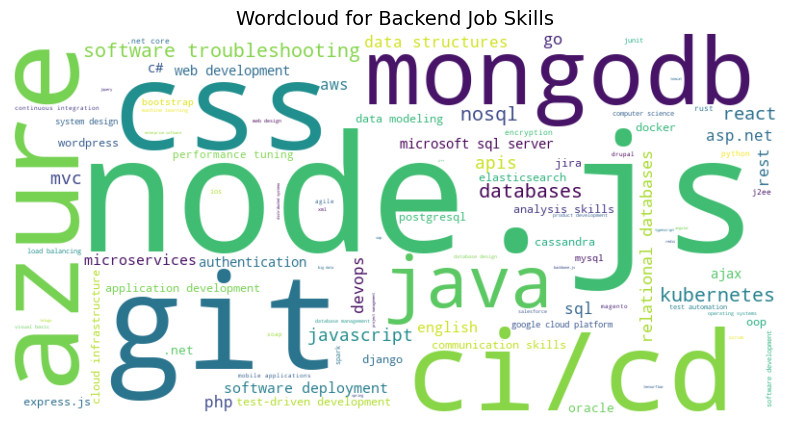

In [60]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(skill_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Wordcloud for Backend Job Skills", fontsize=14)  
plt.axis("off")
plt.show()


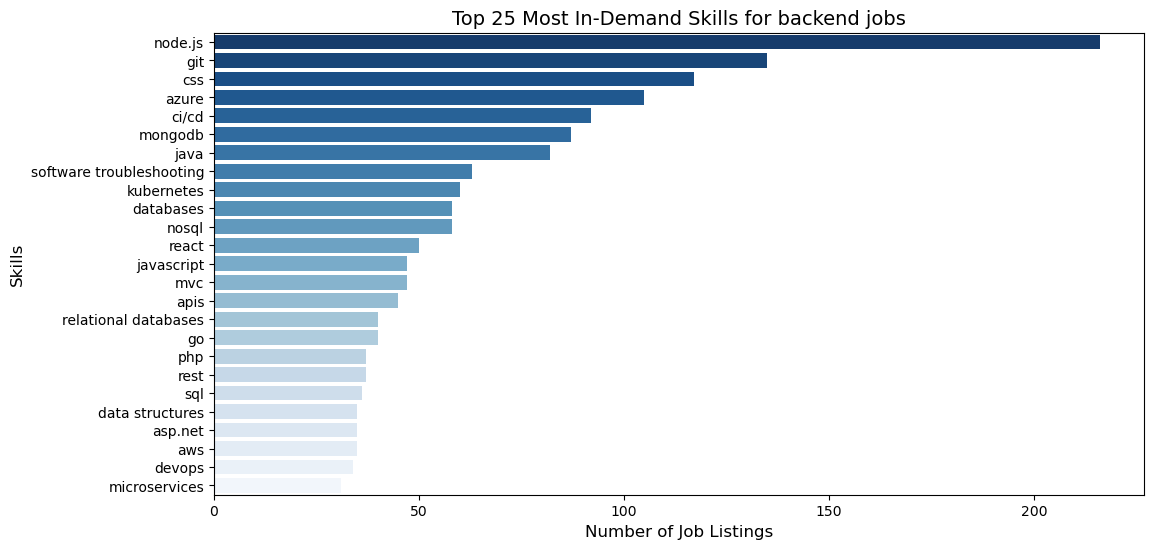

In [61]:
top_skills = skill_df.head(25)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_skills['Count'], y=top_skills['Skill'], palette="Blues_r")

plt.title("Top 25 Most In-Demand Skills for backend jobs", fontsize=14)
plt.xlabel("Number of Job Listings", fontsize=12)
plt.ylabel("Skills", fontsize=12)
plt.show()


### Company vs Salary

In [63]:
top_companies = df.groupby('company_name')['salary_lpa'].mean().reset_index()


top_companies = top_companies.sort_values(by='salary_lpa', ascending=False)


print(top_companies.head(10))


                                         company_name  salary_lpa
45                                             BEIING        50.0
383                                          Talentxo        50.0
167                          HiFX IT & Media Services        48.0
210                                         Keywordio        48.0
207                                 Kavayah Solutions        48.0
239                                           Mitsogo        48.0
459                                vmedulife software        48.0
161                      HELYXON Healthcare Solutions        48.0
377                                      SynapseIndia        48.0
101  DataTerrain India Pvt Ltd. (www.dataterrain.com)        48.0


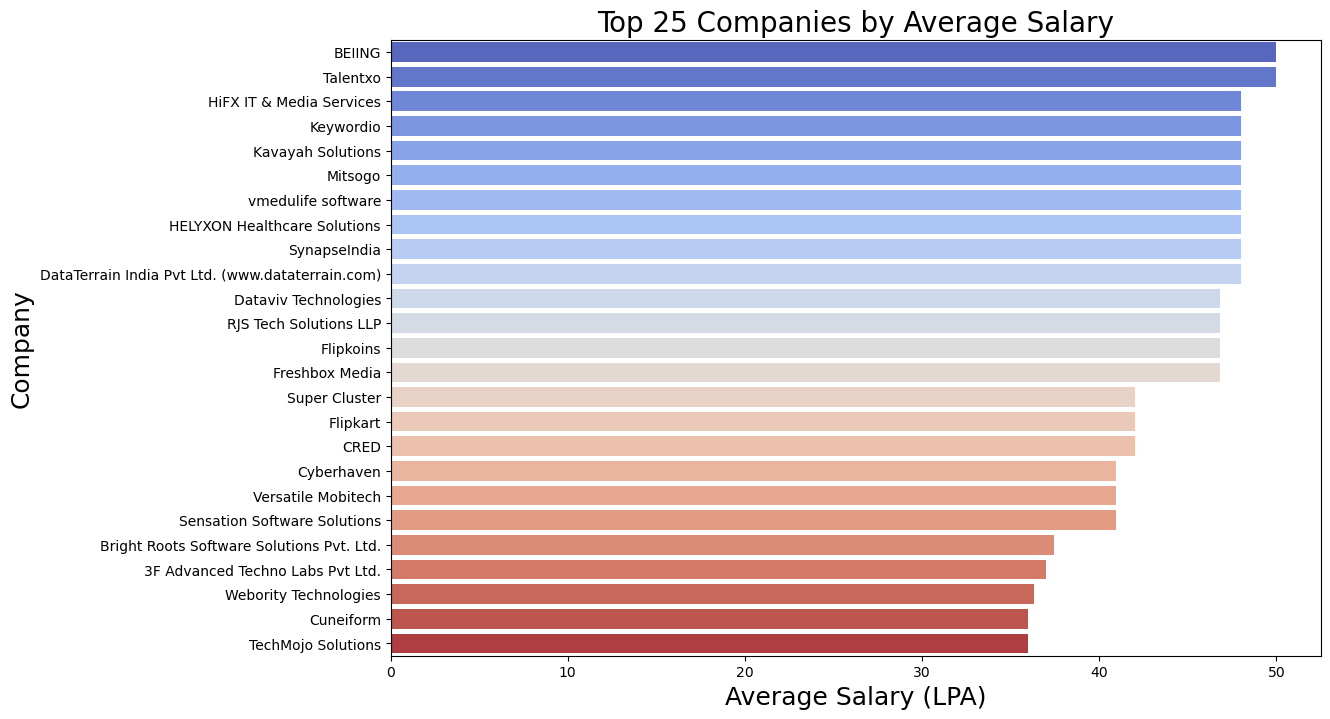

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt


top_10 = top_companies.head(25)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_10['salary_lpa'], y=top_10['company_name'], palette="coolwarm")

plt.title("Top 25 Companies by Average Salary", fontsize=20)
plt.xlabel("Average Salary (LPA)", fontsize=18)
plt.ylabel("Company", fontsize=18)
plt.show()


### Location Vs Salary

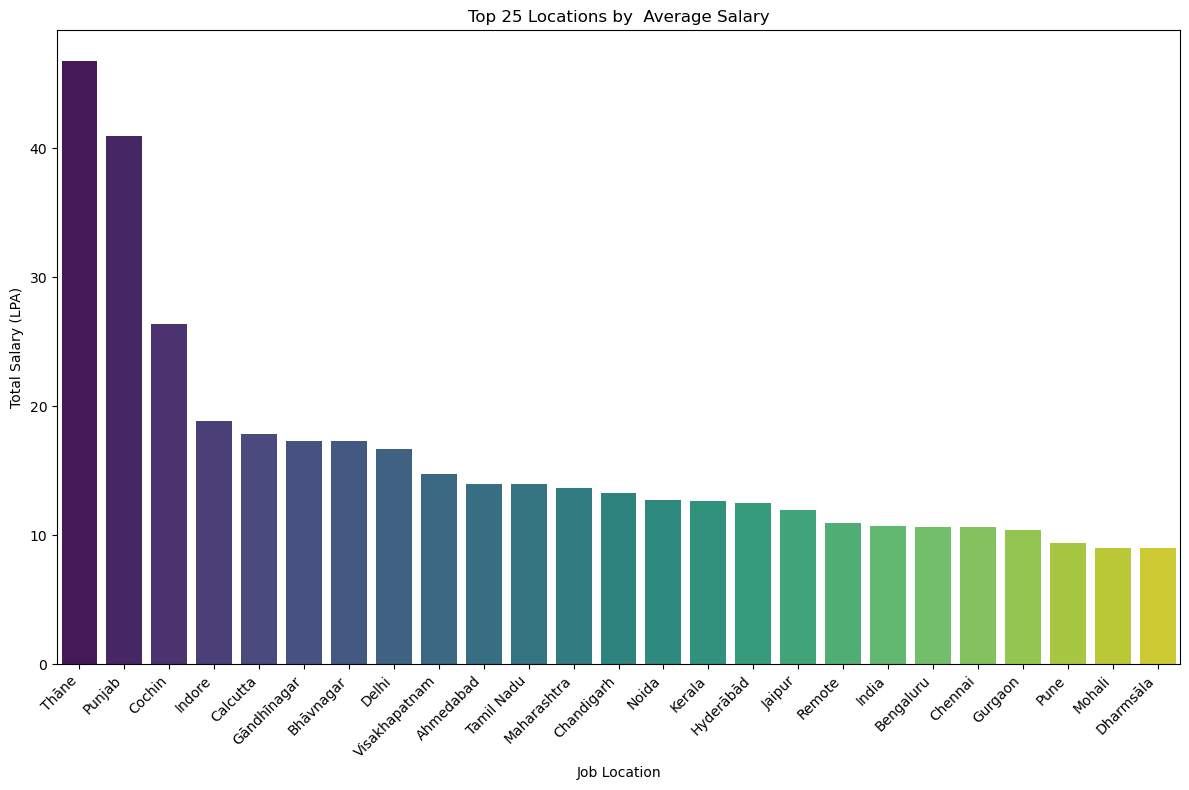

In [66]:
salary_by_location = df.groupby('job_location')['salary_lpa'].mean()


top_locations = salary_by_location.sort_values(ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.index, y=top_locations.values, palette='viridis')


plt.xlabel('Job Location')
plt.ylabel('Total Salary (LPA)')
plt.title('Top 25 Locations by  Average Salary')

plt.xticks(rotation=45, ha='right')


plt.tight_layout()
plt.show()

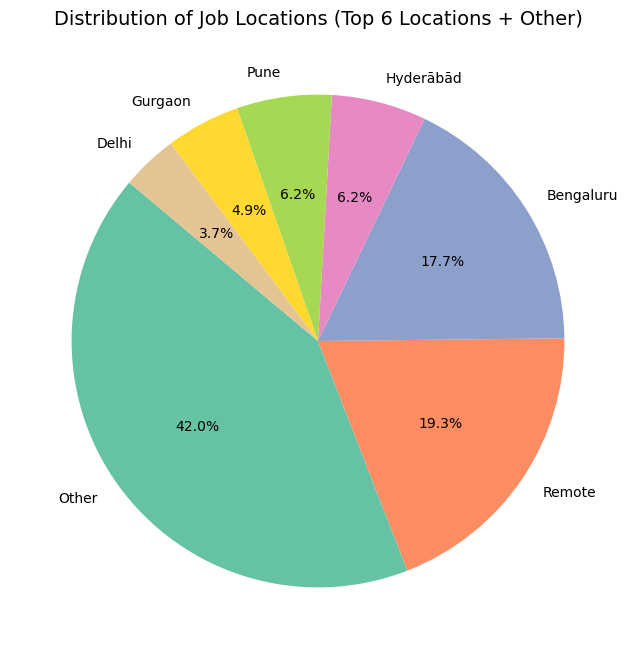

In [67]:
# Calculate the frequency of each location, excluding 'India'
location_counts = df[df['job_location'] != 'India']['job_location'].value_counts()

# Get the top 6 most frequent locations
top_locations = location_counts.head(6).index

# Group 'India' and other locations as 'Other'
df['job_location_grouped'] = df['job_location'].apply(lambda x: x if x in top_locations else 'Other')

# Calculate the frequency of the grouped locations
location_grouped_counts = df['job_location_grouped'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(location_grouped_counts, labels=location_grouped_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(location_grouped_counts)))

# Set the title
plt.title("Distribution of Job Locations (Top 6 Locations + Other)", fontsize=14)

# Show the pie chart
plt.show()

### Role vs Salary

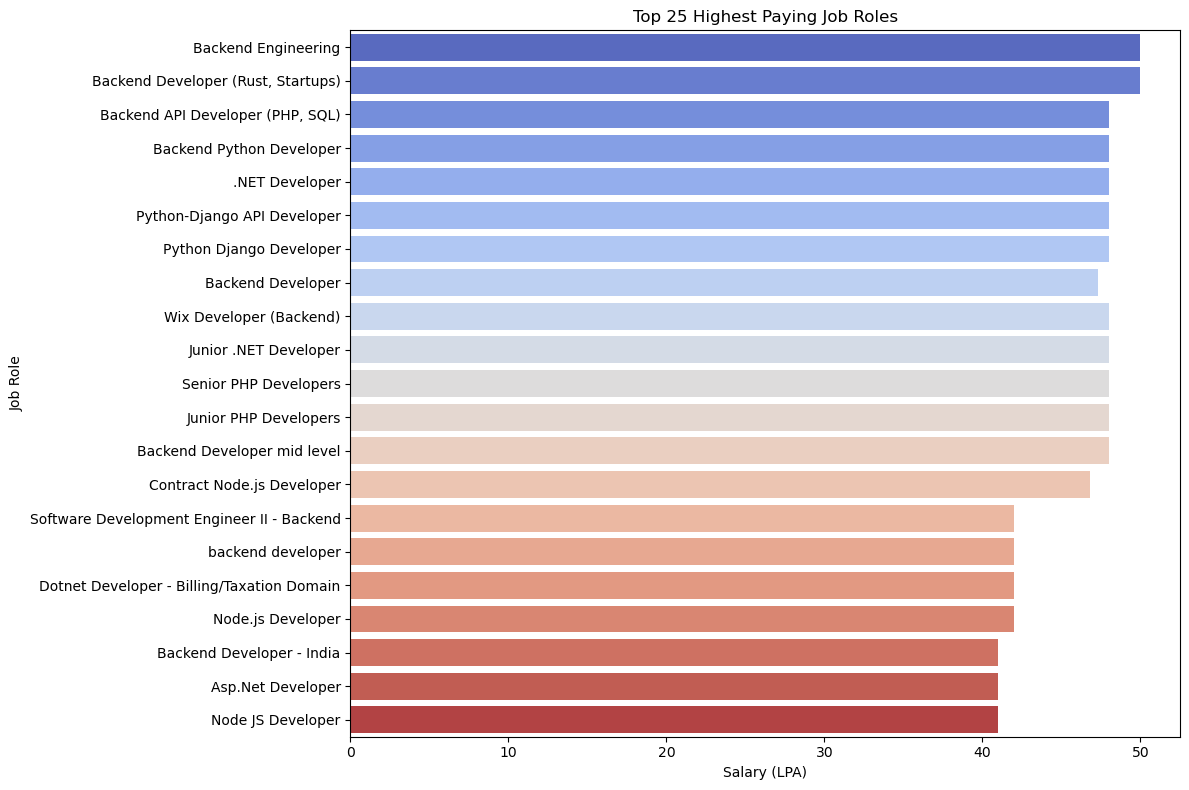

In [69]:
top_roles_by_salary = df[['job_role', 'salary_lpa']].sort_values(by='salary_lpa', ascending=False).head(25)


plt.figure(figsize=(12, 8))
sns.barplot(x='salary_lpa', y='job_role', data=top_roles_by_salary, palette='coolwarm',errorbar=None)


plt.xlabel('Salary (LPA)')
plt.ylabel('Job Role')
plt.title('Top 25 Highest Paying Job Roles')


plt.tight_layout()
plt.show()

### Skills VS Salary

In [71]:
df_skills=df.explode("skills")

skill_counts = df_skills['skills'].value_counts()

# Get the top 10 most frequent skills
top_skills = skill_counts.head(10).index

# Filter the DataFrame to keep only rows with the top 10 skills
df_top_skills = df_skills[df_skills['skills'].isin(top_skills)]



C:\Users\Asus\AppData\Local\Temp\ipykernel_25588\3315627828.py:2: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.options.mode.use_inf_as_na = True
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


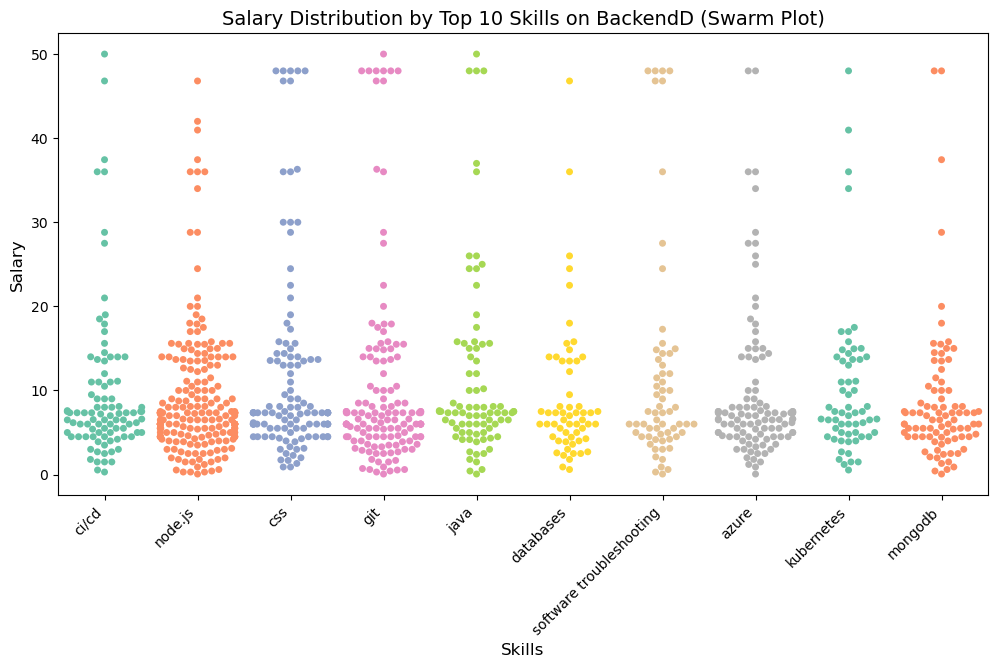

In [72]:
warnings.simplefilter(action='ignore', category=UserWarning)
pd.options.mode.use_inf_as_na = True
plt.figure(figsize=(12, 6))
# sns.swarmplot(x='skills', y='salary_pa', data=df_top_skills, palette="Set2")
sns.swarmplot(x='skills', y='salary_lpa', data=df_top_skills,palette="Set2",hue="skills",legend=False)

plt.title("Salary Distribution by Top 10 Skills on BackendD (Swarm Plot)", fontsize=14)
plt.xlabel("Skills", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

### Rating vs Salary

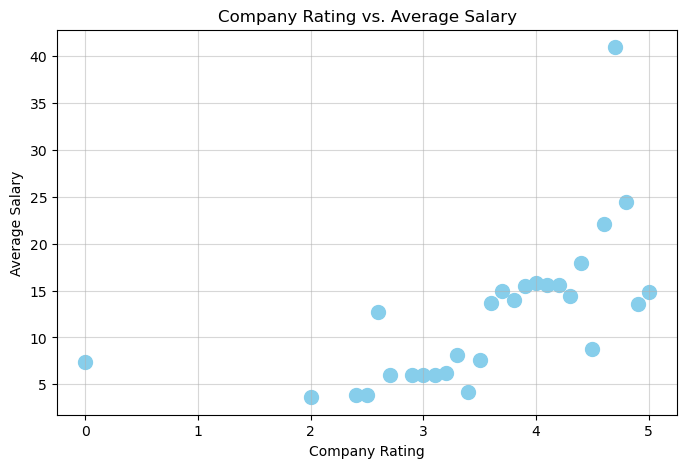

In [74]:
rating_avg_salary = df.groupby('company_rating')['salary_lpa'].mean()
# Step 1a: Map the. average salary to a diction
plt.figure(figsize=(8, 5))
plt.scatter(rating_avg_salary.index, rating_avg_salary.values, color='skyblue', s=100)
plt.title('Company Rating vs. Average Salary')
plt.xlabel('Company Rating')
plt.ylabel('Average Salary')
plt.grid(alpha=0.5)
plt.show()


In [75]:
df_filtered = df[df['company_rating'] != 0]
correlation = df_filtered['company_rating'].corr(df_filtered['salary_lpa'])
correlation

0.27292090995724655